In [ ]:
"""

Random Tree (v1 of RRT*):
- Choose random point
- Choose a random point in free space
- Look for an existing node closest to random point. Let this line have direction 'u'
- Draw a new node in direction 'u' at a distance epsilon, where epsilon is the step length you chose
- Repeat until you're within a tolerance of the goal node
- Visualize with scatter plots

Limitations:
- Can only deal with rectangular obstacles
- When searching for whether there is an obstacle along a given edge (when generating ptList), it samples 10 points
  in between the start and end nodes and checks if all of them lie in free space. A better approach would be to use
  some geomertic way of gauging this, but this was not attempted.

"""

In [19]:
import random
import math

class Node:
    def __init__(self,x,y,parent):
        self.x = x
        self.y = y
        self.parent = parent
    
    
class RRT:
    def __init__(self,start,end,obstacles,thresholdToGoal,max_points):
        self.start = start
        self.end = end
        self.count = 0
        self.gridX = 20
        self.gridY = 20
        self.epsilon = 2
        self.node_list = [Node(start[0],start[1],None)]
        self.obstacles = obstacles
        self.threshold = thresholdToGoal
        self.max_points = max_points
        
        
    def random_pt(self):
        rx = random.randint(0,self.gridX)
        ry = random.randint(0,self.gridY)
        while not self.check_free_node(rx,ry):
            rx = random.randint(0,self.gridX)
            ry = random.randint(0,self.gridY)
        return rx,ry
    
    
    def check_free_node(self,x,y):
        for bb in self.obstacles:
            if bb[0]<=x<=bb[2] and bb[3]<=y<=bb[1]:
                return False
        return True
    
    
    def unique(self,x,y):
        for i in self.node_list:
            if (x,y) == (i.x,i.y):
                return False
        return True
    
    
    def euclidean_dist(self,x0,y0,x1,y1):
        return ((x0-x1)**2+(y0-y1)**2)**0.5
    
    
    def nearest_node(self):
        rx,ry = self.random_pt()
        while not self.unique(rx,ry):
            rx,ry = self.random_pt()
        minDist = 10**10
        for node in self.node_list:
            if self.euclidean_dist(node.x,node.y,rx,ry) < minDist:
                minDist = self.euclidean_dist(node.x,node.y,rx,ry)
                selectedNode = node
        return rx,ry,selectedNode
    
    
    def new_node(self):
        rx,ry,node = self.nearest_node()        
        v = (rx-node.x,ry-node.y)
        dist = (v[0]**2 + v[1]**2)**0.5
        ux = v[0]/dist
        uy = v[1]/dist
        if dist > self.epsilon:
            newx = node.x+self.epsilon*ux
            newy = node.y+self.epsilon*uy
            ptList = [(node.x+self.epsilon*ux/i,node.y+self.epsilon*uy/i) for i in range(1,11)]
        else:
            newx = rx
            newy = ry
            ptList = [(node.x+dist*ux/i,node.y+dist*uy/i) for i in range(1,11)]
        validPt = True
        for i in ptList:
            if not self.check_free_node(i[0],i[1]):
                validPt = False
                break
        if validPt:
            self.node_list.append(Node(newx,newy,node))
            self.count+=1
            
            
    def run_rrt(self):
        while not (math.isclose(self.node_list[-1].x,self.end[0],abs_tol=self.threshold) and 
                   math.isclose(self.node_list[-1].y,self.end[1],abs_tol=self.threshold)):
            
            if self.count > self.max_points:
                break
            self.nearest_node()
            self.new_node()

            
obstacleList = [(8,15,15,8),(0,19,5,14)] #top left x, tope left y, bottom right x, bottom right y        
run1 = RRT((5,5),(18,16),obstacleList,1,200)
run1.run_rrt()

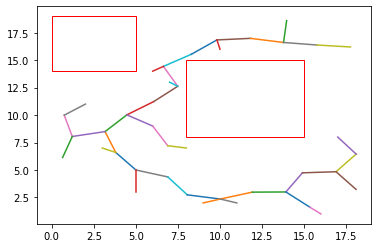

In [20]:
#Plotting all branches

import matplotlib.pyplot as plt
rectangle = plt.Rectangle((8,8), 7, 7, fc="blue",ec="red",fill=False)
rectangle1 = plt.Rectangle((0,14), 5, 5, fc="blue",ec="red",fill=False)
plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle1)
for node in run1.node_list:
    if node.parent:
        edgex=[]
        edgey=[]
        edgex.append(node.x)
        edgex.append(node.parent.x)
        edgey.append(node.y)
        edgey.append(node.parent.y)
        plt.plot(edgex,edgey)

<function matplotlib.pyplot.show(close=None, block=None)>

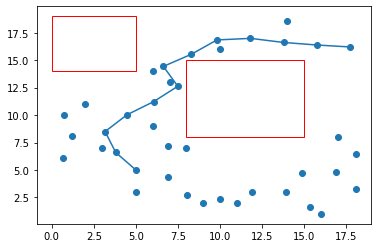

In [23]:
#Plotting only branch to goal

import matplotlib.pyplot as plt

x = [node.x for node in run1.node_list]
y = [node.y for node in run1.node_list]

edgex=[]
edgey=[]
node = run1.node_list[-1]
while node.parent:
    edgex.append(node.x)
    edgey.append(node.y)
    node = node.parent
    
edgex.append(node.x)
edgey.append(node.y)

rectangle = plt.Rectangle((8,8), 7, 7, fc="blue",ec="red",fill=False)
rectangle1 = plt.Rectangle((0,14), 5, 5, fc="blue",ec="red",fill=False)
plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle1)
plt.scatter(x,y)
plt.plot(edgex,edgey)
plt.show

In [ ]:
import random
import math

class Node:
    def __init__(self,x,y,parent):
        self.x = x
        self.y = y
        self.parent = parent
    
    
class RRT:
    def __init__(self,start,end,obstacles,thresholdToGoal,max_points):
        self.start = start
        self.end = end
        self.count = 0
        self.gridX = 20
        self.gridY = 20
        self.epsilon = 2
        self.node_list = [Node(start[0],start[1],None)]
        self.obstacles = obstacles
        self.threshold = thresholdToGoal
        self.max_points = max_points
        
        
    def random_pt(self):
        rx = random.randint(0,self.gridX)
        ry = random.randint(0,self.gridY)
        while not self.check_free_node(rx,ry):
            rx = random.randint(0,self.gridX)
            ry = random.randint(0,self.gridY)
        return rx,ry
    
    
    def check_free_node(self,x,y):
        for bb in self.obstacles:
            if bb[0]<=x<=bb[2] and bb[3]<=y<=bb[1]:
                return False
        return True
    
    
    def unique(self,x,y):
        for i in self.node_list:
            if (x,y) == (i.x,i.y):
                return False
        return True
    
    
    def euclidean_dist(self,x0,y0,x1,y1):
        return ((x0-x1)**2+(y0-y1)**2)**0.5
    
    
    def nearest_node(self):
        rx,ry = self.random_pt()
        while not self.unique(rx,ry):
            rx,ry = self.random_pt()
        minDist = 10**10
        for node in self.node_list:
            if self.euclidean_dist(node.x,node.y,rx,ry) < minDist:
                minDist = self.euclidean_dist(node.x,node.y,rx,ry)
                selectedNode = node
        return rx,ry,selectedNode
    
    
    def new_node(self):
        rx,ry,node = self.nearest_node()        
        v = (rx-node.x,ry-node.y)
        dist = (v[0]**2 + v[1]**2)**0.5
        ux = v[0]/dist
        uy = v[1]/dist
        if dist > self.epsilon:
            newx = node.x+self.epsilon*ux
            newy = node.y+self.epsilon*uy
            ptList = [(node.x+self.epsilon*ux/i,node.y+self.epsilon*uy/i) for i in range(1,11)]
        else:
            newx = rx
            newy = ry
            ptList = [(node.x+dist*ux/i,node.y+dist*uy/i) for i in range(1,11)]
        validPt = True
        for i in ptList:
            if not self.check_free_node(i[0],i[1]):
                validPt = False
                break
        if validPt:
            self.shortest_dist(Node(newx,newy))
            self.node_list.append(Node(newx,newy,node))
            self.count+=1
            
    def shortest_dist(self):
        dist = {}
        for i in self.node_list:
            if (math.isclose(self.node_list[-1].x,i.x,abs_tol=5) and 
                   math.isclose(self.node_list[-1].y,self.end[1],abs_tol=5)):
                dist[self.euclidean_dist()
    
    
    
    def run_rrt(self):
        while not (math.isclose(self.node_list[-1].x,self.end[0],abs_tol=self.threshold) and 
                   math.isclose(self.node_list[-1].y,self.end[1],abs_tol=self.threshold)):
            
            if self.count > self.max_points:
                break
            self.nearest_node()
            self.new_node()

            
obstacleList = [(8,15,15,8),(0,19,5,14)] #top left x, tope left y, bottom right x, bottom right y        
run1 = RRT((5,5),(18,16),obstacleList,1,200)
run1.run_rrt()